In [39]:
import numpy as np
import cantera as ct
import pandas as pd 
import os
import sys
import time
import itertools
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import glob
import seaborn as sns
from matplotlib.lines import Line2D


In [2]:
data_d0 = pd.read_csv("/work/kotlarcm/WORK/Automated_Reduced/1D_CF_Ex/Detailed/CF_T800.0_extinction.csv")
data_r0= pd.read_csv("/work/kotlarcm/WORK/Automated_Reduced/1D_CF_Ex/OptimB/CF_T800.0_extinction.csv")
species = [col for col in data_r0.columns if col.startswith("Y_")]


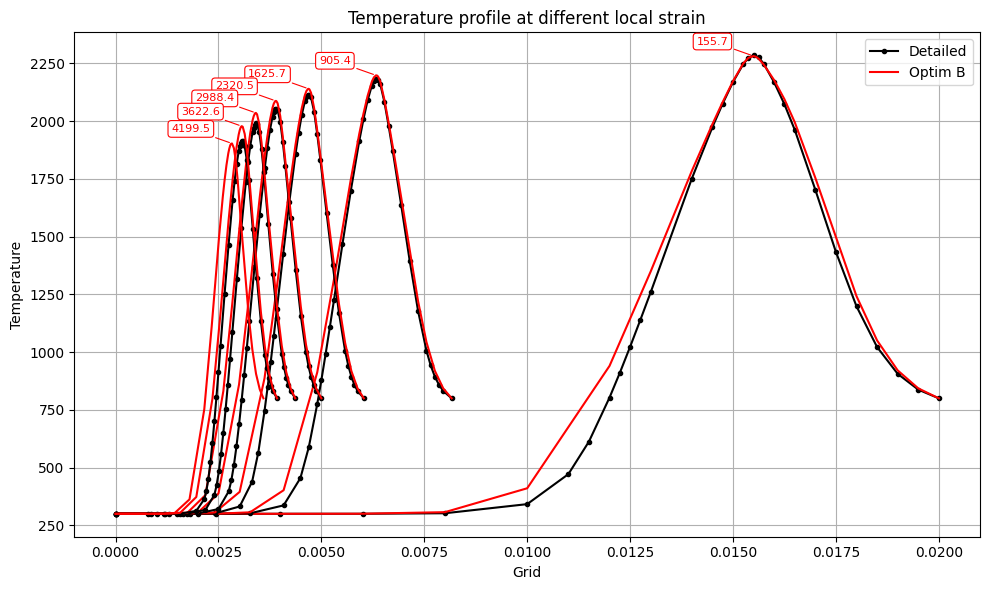

In [43]:

plt.figure(figsize=(10, 6))

# Union des global strains
unique_strains = sorted(set(data_d0["global_strain"].unique()) | set(data_r0["global_strain"].unique()))

for strain in unique_strains:
    # Données détaillées (noir)
    if strain in data_d0["global_strain"].values:
        sub_d = data_d0[data_d0["global_strain"] == strain]
        plt.plot(sub_d["grid"], sub_d["T"], 'k.-')
        
    # Données réduites (rouge)
    if strain in data_r0["global_strain"].values:
        sub_r = data_r0[data_r0["global_strain"] == strain]
        plt.plot(sub_r["grid"], sub_r["T"], 'r-')
        idx_max = sub_r["T"].idxmax()
        Tmax = sub_r.loc[idx_max, "T"]
        x_Tmax = sub_r.loc[idx_max, "grid"]
        
        plt.annotate(
            text=f"{sub_r['local_strain'].unique()[0]:.1f}",
            xy=(x_Tmax, Tmax),
            xytext=(x_Tmax-0.001, Tmax + 50),
            textcoords='data',
            ha='center',
            fontsize=8,
            color='red',
            bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="red", lw=0.8),
            arrowprops=dict(arrowstyle="-", color='red', lw=0.8),
        )
legend_elements = [
    Line2D([0], [0], color='black', marker='.', linestyle='-', label='Detailed'),
    Line2D([0], [0], color='red', linestyle='-', label='Optim B')
]

plt.legend(handles=legend_elements, loc='upper right', ncol=1, frameon=True)
plt.xlabel("Grid")
plt.ylabel("Temperature")
plt.title("Temperature profile at different local strain")
plt.grid(True)
plt.tight_layout()
plt.savefig("CF_Temperature_Profile_T800.0_Noprocessing.png")
plt.show()


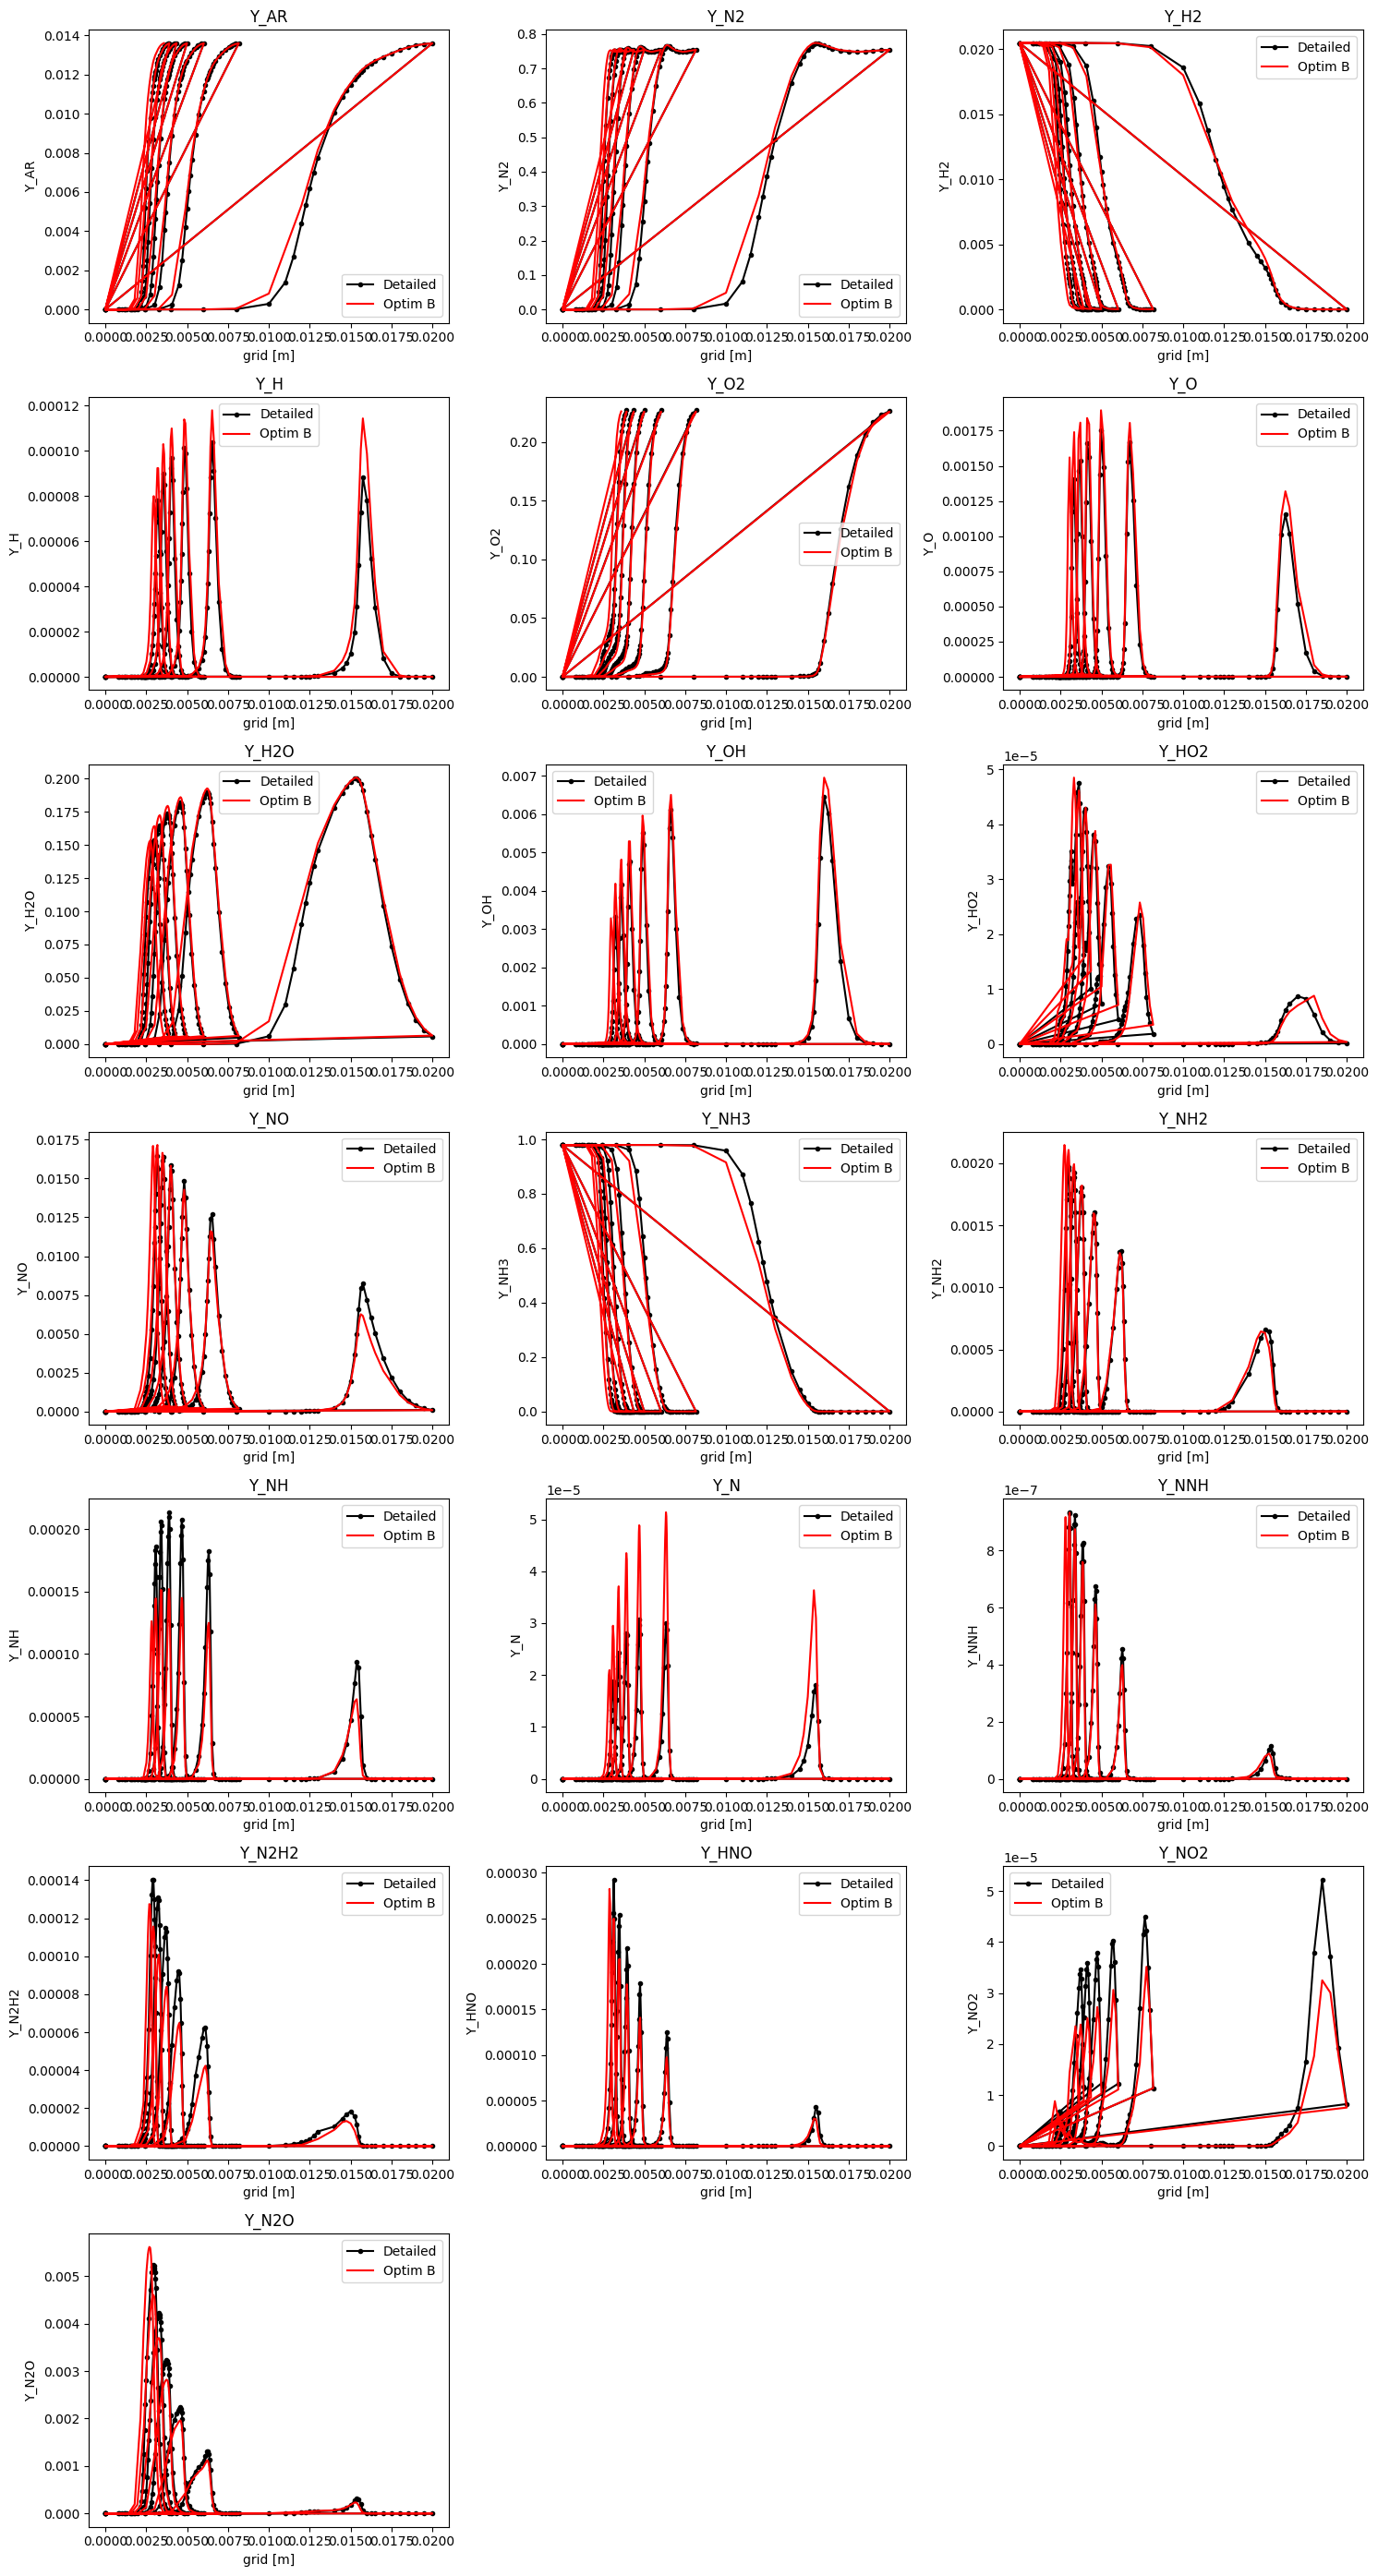

In [44]:
n_species = len(species)
n_cols = 3 # You can adjust number of columns depending on layout preference
n_rows = (n_species + n_cols - 1) // n_cols  # Ceiling division for rows

fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False)

for i, s in enumerate(species):
    row, col = divmod(i, n_cols)
    ax = axs[row][col]
    ax.plot(data_d0["grid"], data_d0[s], 'k.-', label='Detailed')
    ax.plot(data_r0["grid"], data_r0[s], 'r', label='Optim B')
    ax.set_xlabel("grid [m]")
    ax.set_ylabel(s)
    ax.legend()
    ax.set_title(s)

# Hide any unused subplots
for i in range(n_species, n_rows * n_cols):
    row, col = divmod(i, n_cols)
    fig.delaxes(axs[row][col])

plt.tight_layout()
plt.savefig("CF_species.png")
plt.show()



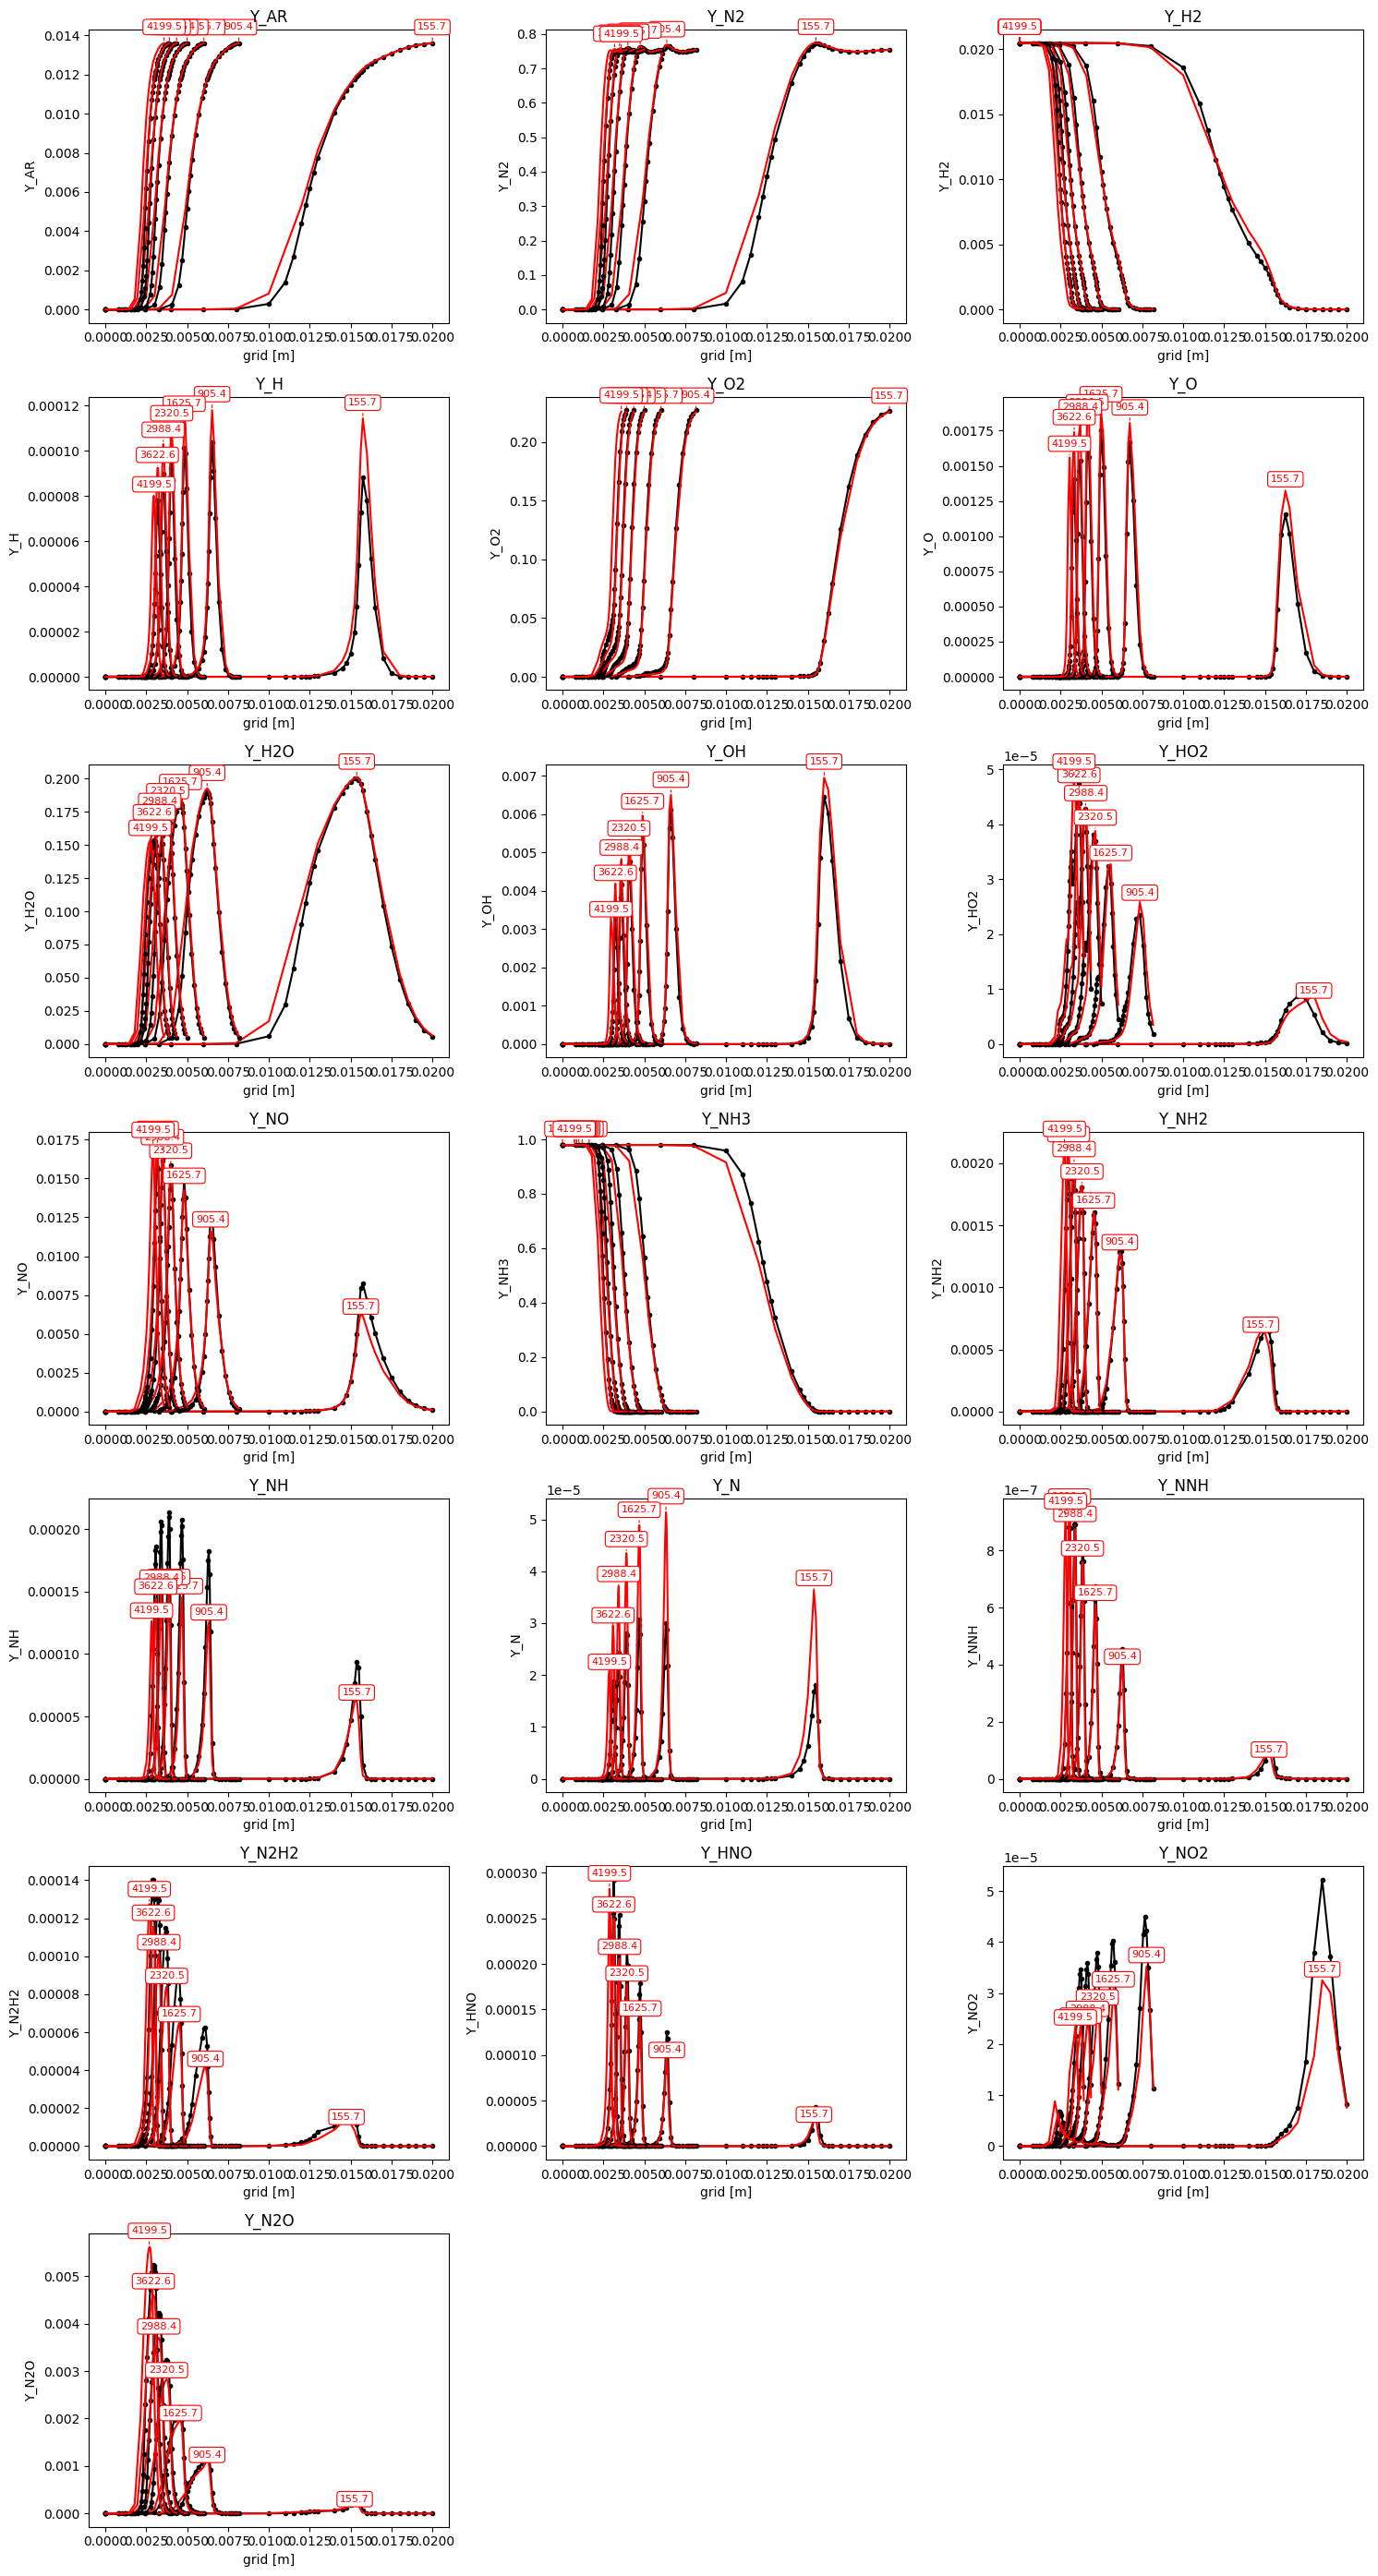

In [19]:
import matplotlib.pyplot as plt

n_species = len(species)
n_cols = 3
n_rows = (n_species + n_cols - 1) // n_cols

fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False)

unique_strains = sorted(set(data_d0["global_strain"].unique()) | set(data_r0["global_strain"].unique()))

for i, s in enumerate(species):
    row, col = divmod(i, n_cols)
    ax = axs[row][col]

    for strain in unique_strains:
        # Tracer detailed
        if strain in data_d0["global_strain"].values:
            sub_d = data_d0[data_d0["global_strain"] == strain]
            ax.plot(sub_d["grid"], sub_d[s], 'k.-')

        # Tracer reduced + annotation
        if strain in data_r0["global_strain"].values:
            sub_r = data_r0[data_r0["global_strain"] == strain]
            ax.plot(sub_r["grid"], sub_r[s], 'r-')

            if not sub_r[s].isnull().all() and sub_r[s].max() > 0:
                idx_max = sub_r[s].idxmax()
                Cmax = sub_r.loc[idx_max, s]
                x_Cmax = sub_r.loc[idx_max, "grid"]
                local_strain_val = sub_r.loc[idx_max, "local_strain"]
                y_offset = 0.05 * Cmax  # Décalage vertical

                ax.annotate(
                    text=f"{local_strain_val:.1f}",
                    xy=(x_Cmax, Cmax),
                    xytext=(x_Cmax, Cmax + y_offset),
                    textcoords='data',
                    ha='center',
                    fontsize=8,
                    color='red',
                    bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="red", lw=0.8),
                    arrowprops=dict(arrowstyle="-", color='red', lw=0.8),
                )

    ax.set_xlabel("grid [m]")
    ax.set_ylabel(s)
    ax.set_title(s)

# Supprimer les axes vides
for i in range(n_species, n_rows * n_cols):
    row, col = divmod(i, n_cols)
    fig.delaxes(axs[row][col])

plt.tight_layout()
plt.savefig("CF_species.png")
plt.show()


[900. 800.]


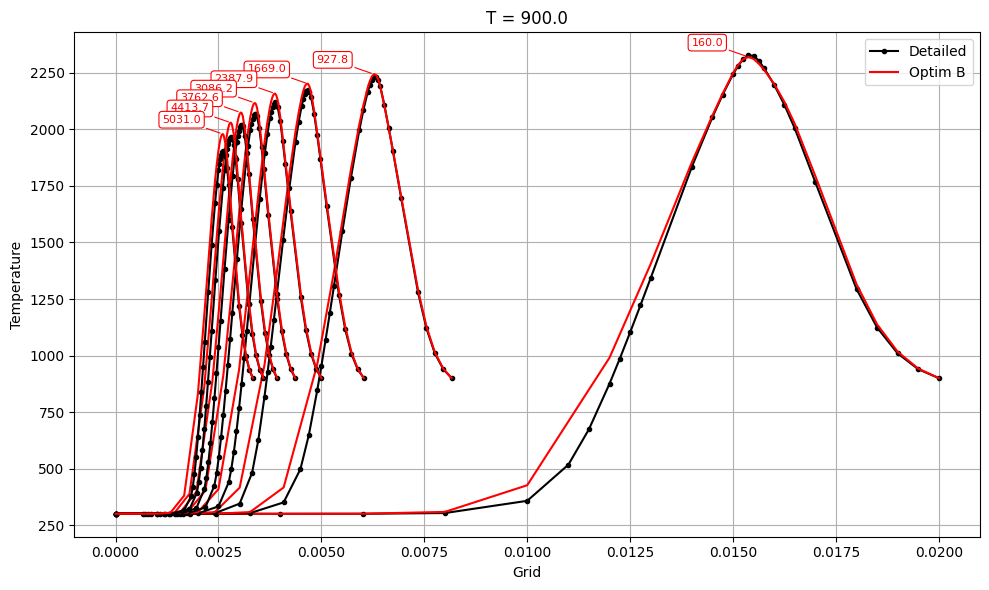

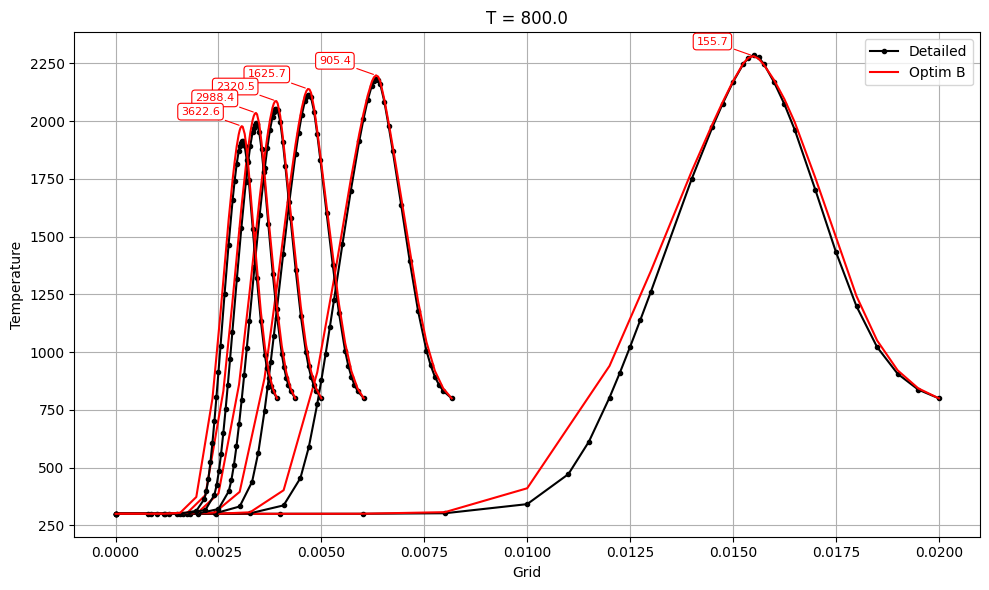

In [45]:
data_d = pd.read_csv('/work/kotlarcm/WORK/Automated_Reduced/1D_CF_Ex/Processing_Detailed.csv')
data_r = pd.read_csv("/work/kotlarcm/WORK/Automated_Reduced/1D_CF_Ex/Processing_OptimB.csv")
species = [col for col in data_r.columns if col.startswith("Y_")]

for T_Init in data_d["T_Init"].unique() : 
    sub_d = data_d[data_d["T_Init"]==T_Init]
    sub_r = data_r[data_r["T_Init"]==T_Init]
    
    plt.figure(figsize=(10, 6))

    # Union des global strains
    unique_strains = sorted(set(sub_d["global_strain"].unique()) | set(sub_r["global_strain"].unique()))

    for strain in unique_strains:
        # Données détaillées (noir)
        if strain in sub_d["global_strain"].values:
            sub_sub_d = sub_d[sub_d["global_strain"] == strain]
            plt.plot(sub_sub_d["common_grid"], sub_sub_d["T"], 'k.-')
            
        # Données réduites (rouge)
        if strain in sub_r["global_strain"].values:
            sub_sub_r = sub_r[sub_r["global_strain"] == strain]
            plt.plot(sub_sub_r["common_grid"], sub_sub_r["T"], 'r-')
            idx_max = sub_sub_r["T"].idxmax()
            Tmax = sub_sub_r.loc[idx_max, "T"]
            x_Tmax = sub_sub_r.loc[idx_max, "common_grid"]
            
            plt.annotate(
                text=f"{sub_sub_r['local_strain'].unique()[0]:.1f}",
                xy=(x_Tmax, Tmax),
                xytext=(x_Tmax-0.001, Tmax + 50),
                textcoords='data',
                ha='center',
                fontsize=8,
                color='red',
                bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="red", lw=0.8),
                arrowprops=dict(arrowstyle="-", color='red', lw=0.8),
            )
            
    legend_elements = [
    Line2D([0], [0], color='black', marker='.', linestyle='-', label='Detailed'),
    Line2D([0], [0], color='red', linestyle='-', label='Optim B')
    ]

    plt.legend(handles=legend_elements, loc='upper right', ncol=1, frameon=True)

    plt.xlabel("Grid")
    plt.ylabel("Temperature")
    plt.title(f"T = {T_Init}")
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f"CF_Temperature_Profile_T{T_Init}_Processing.png")
    plt.show()


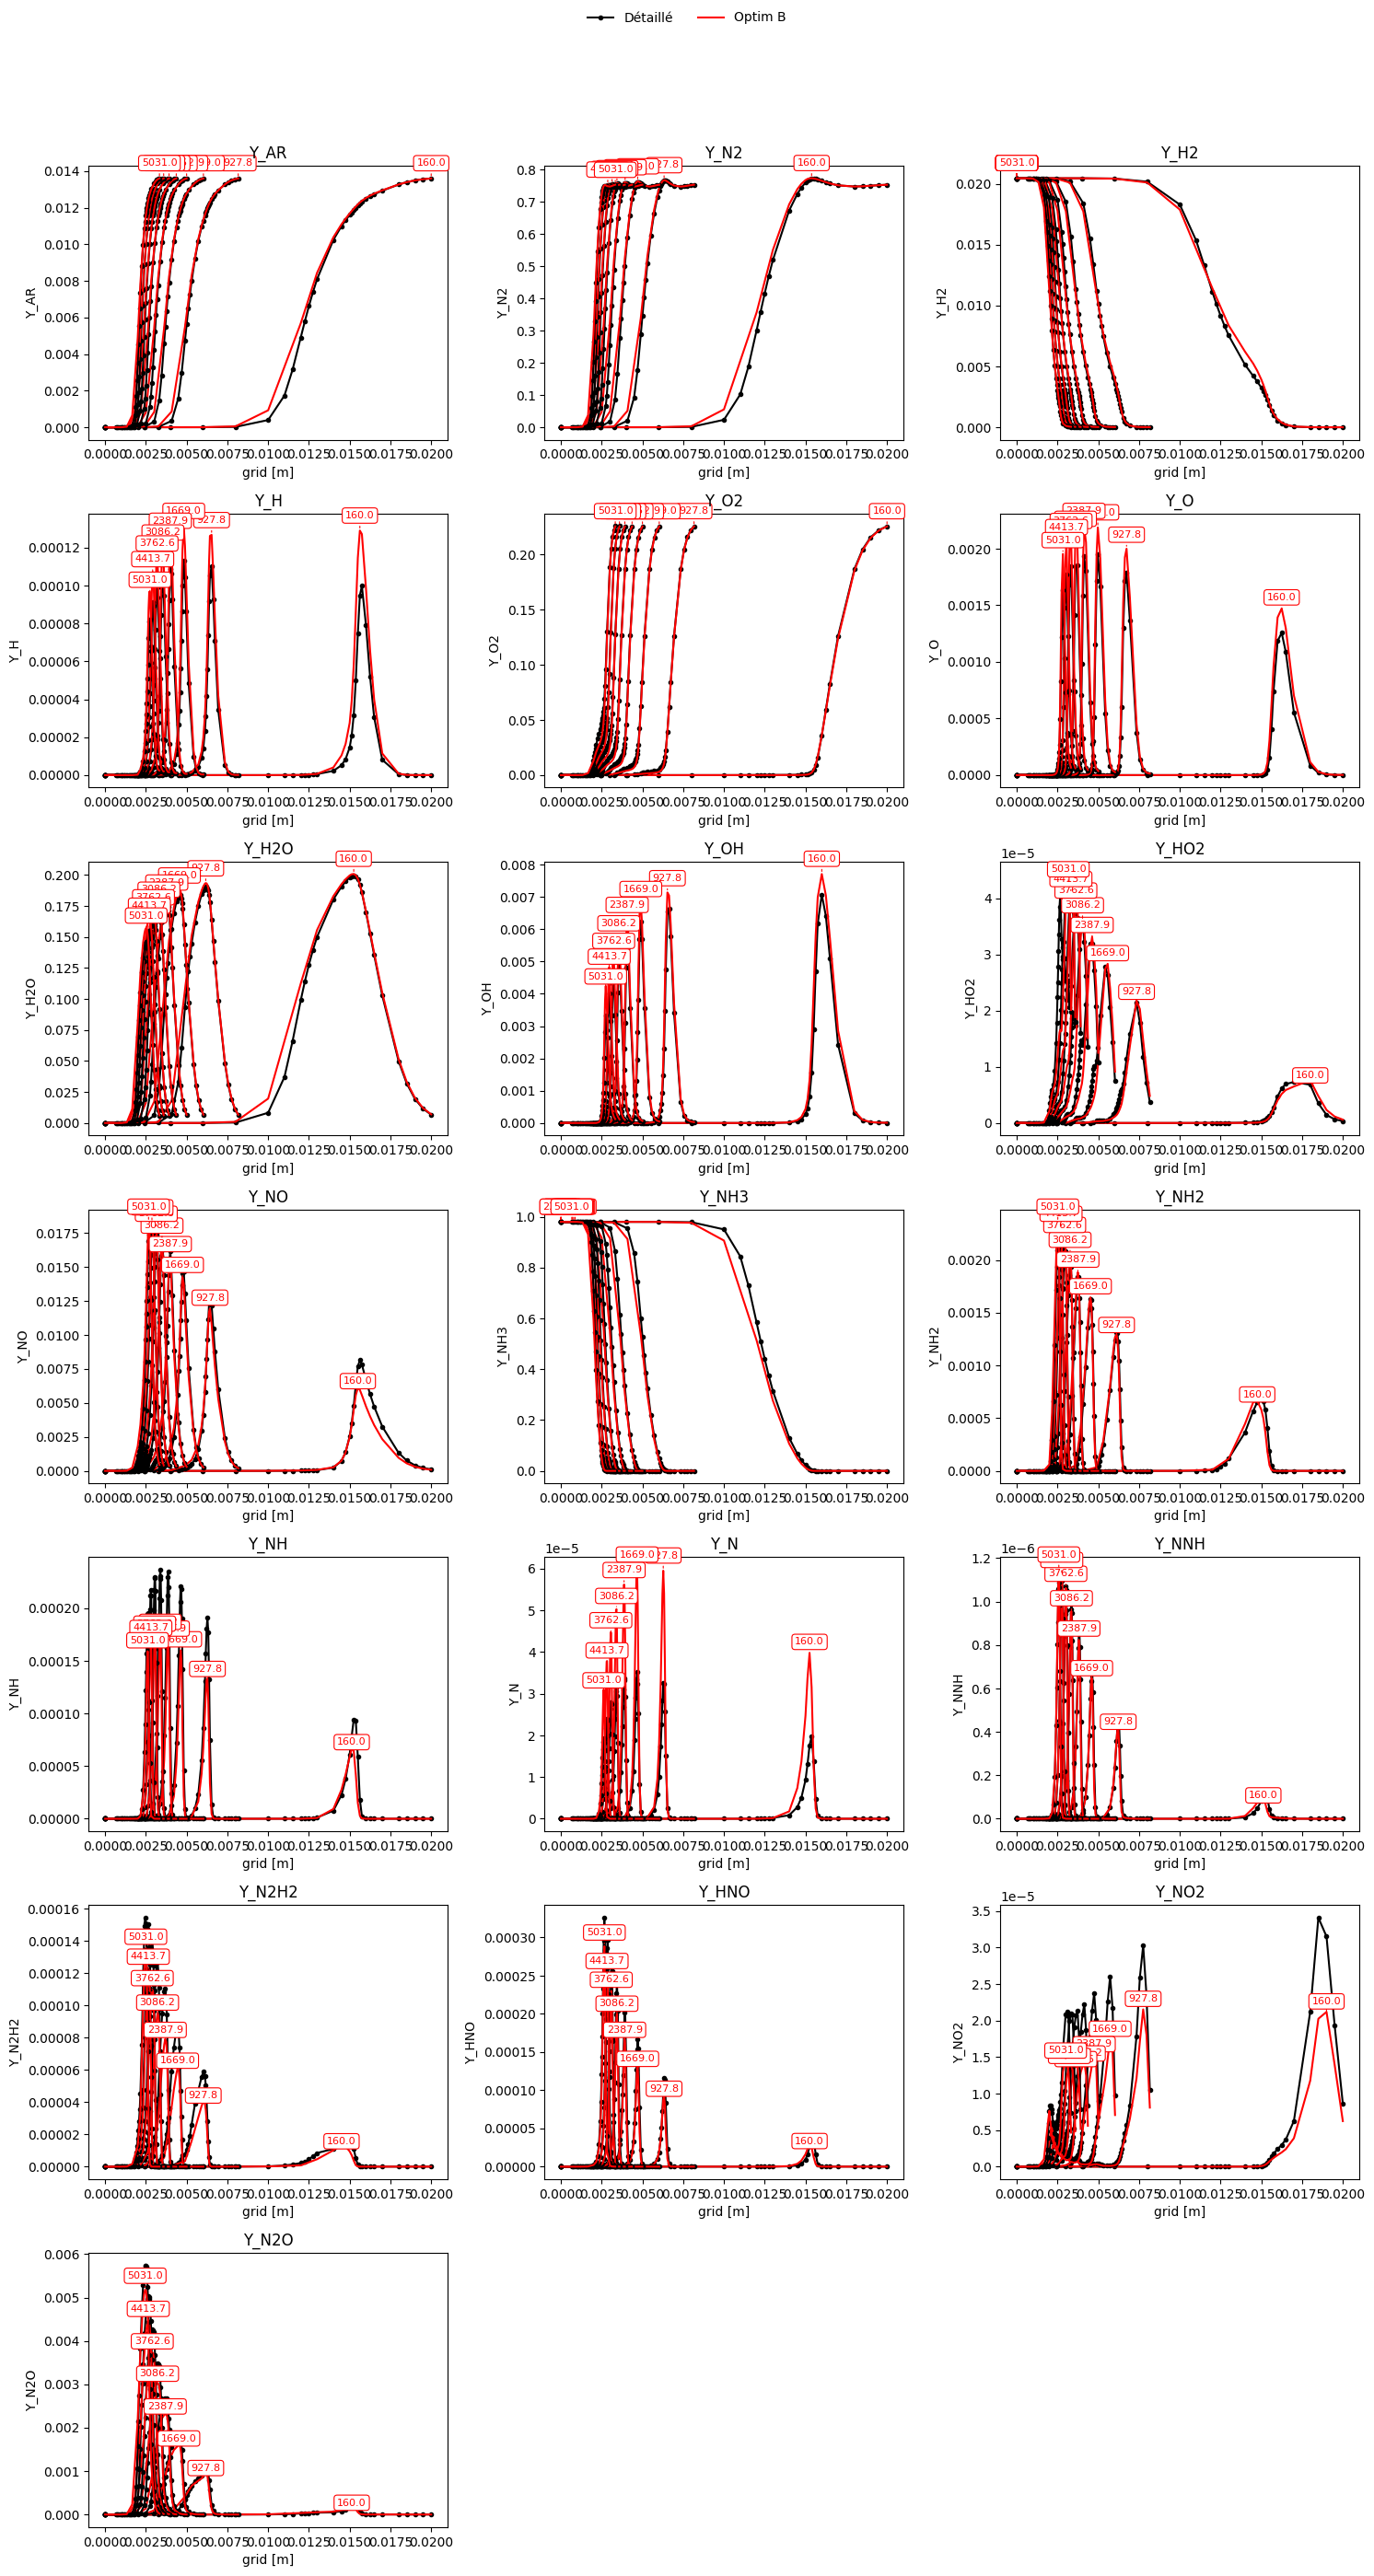

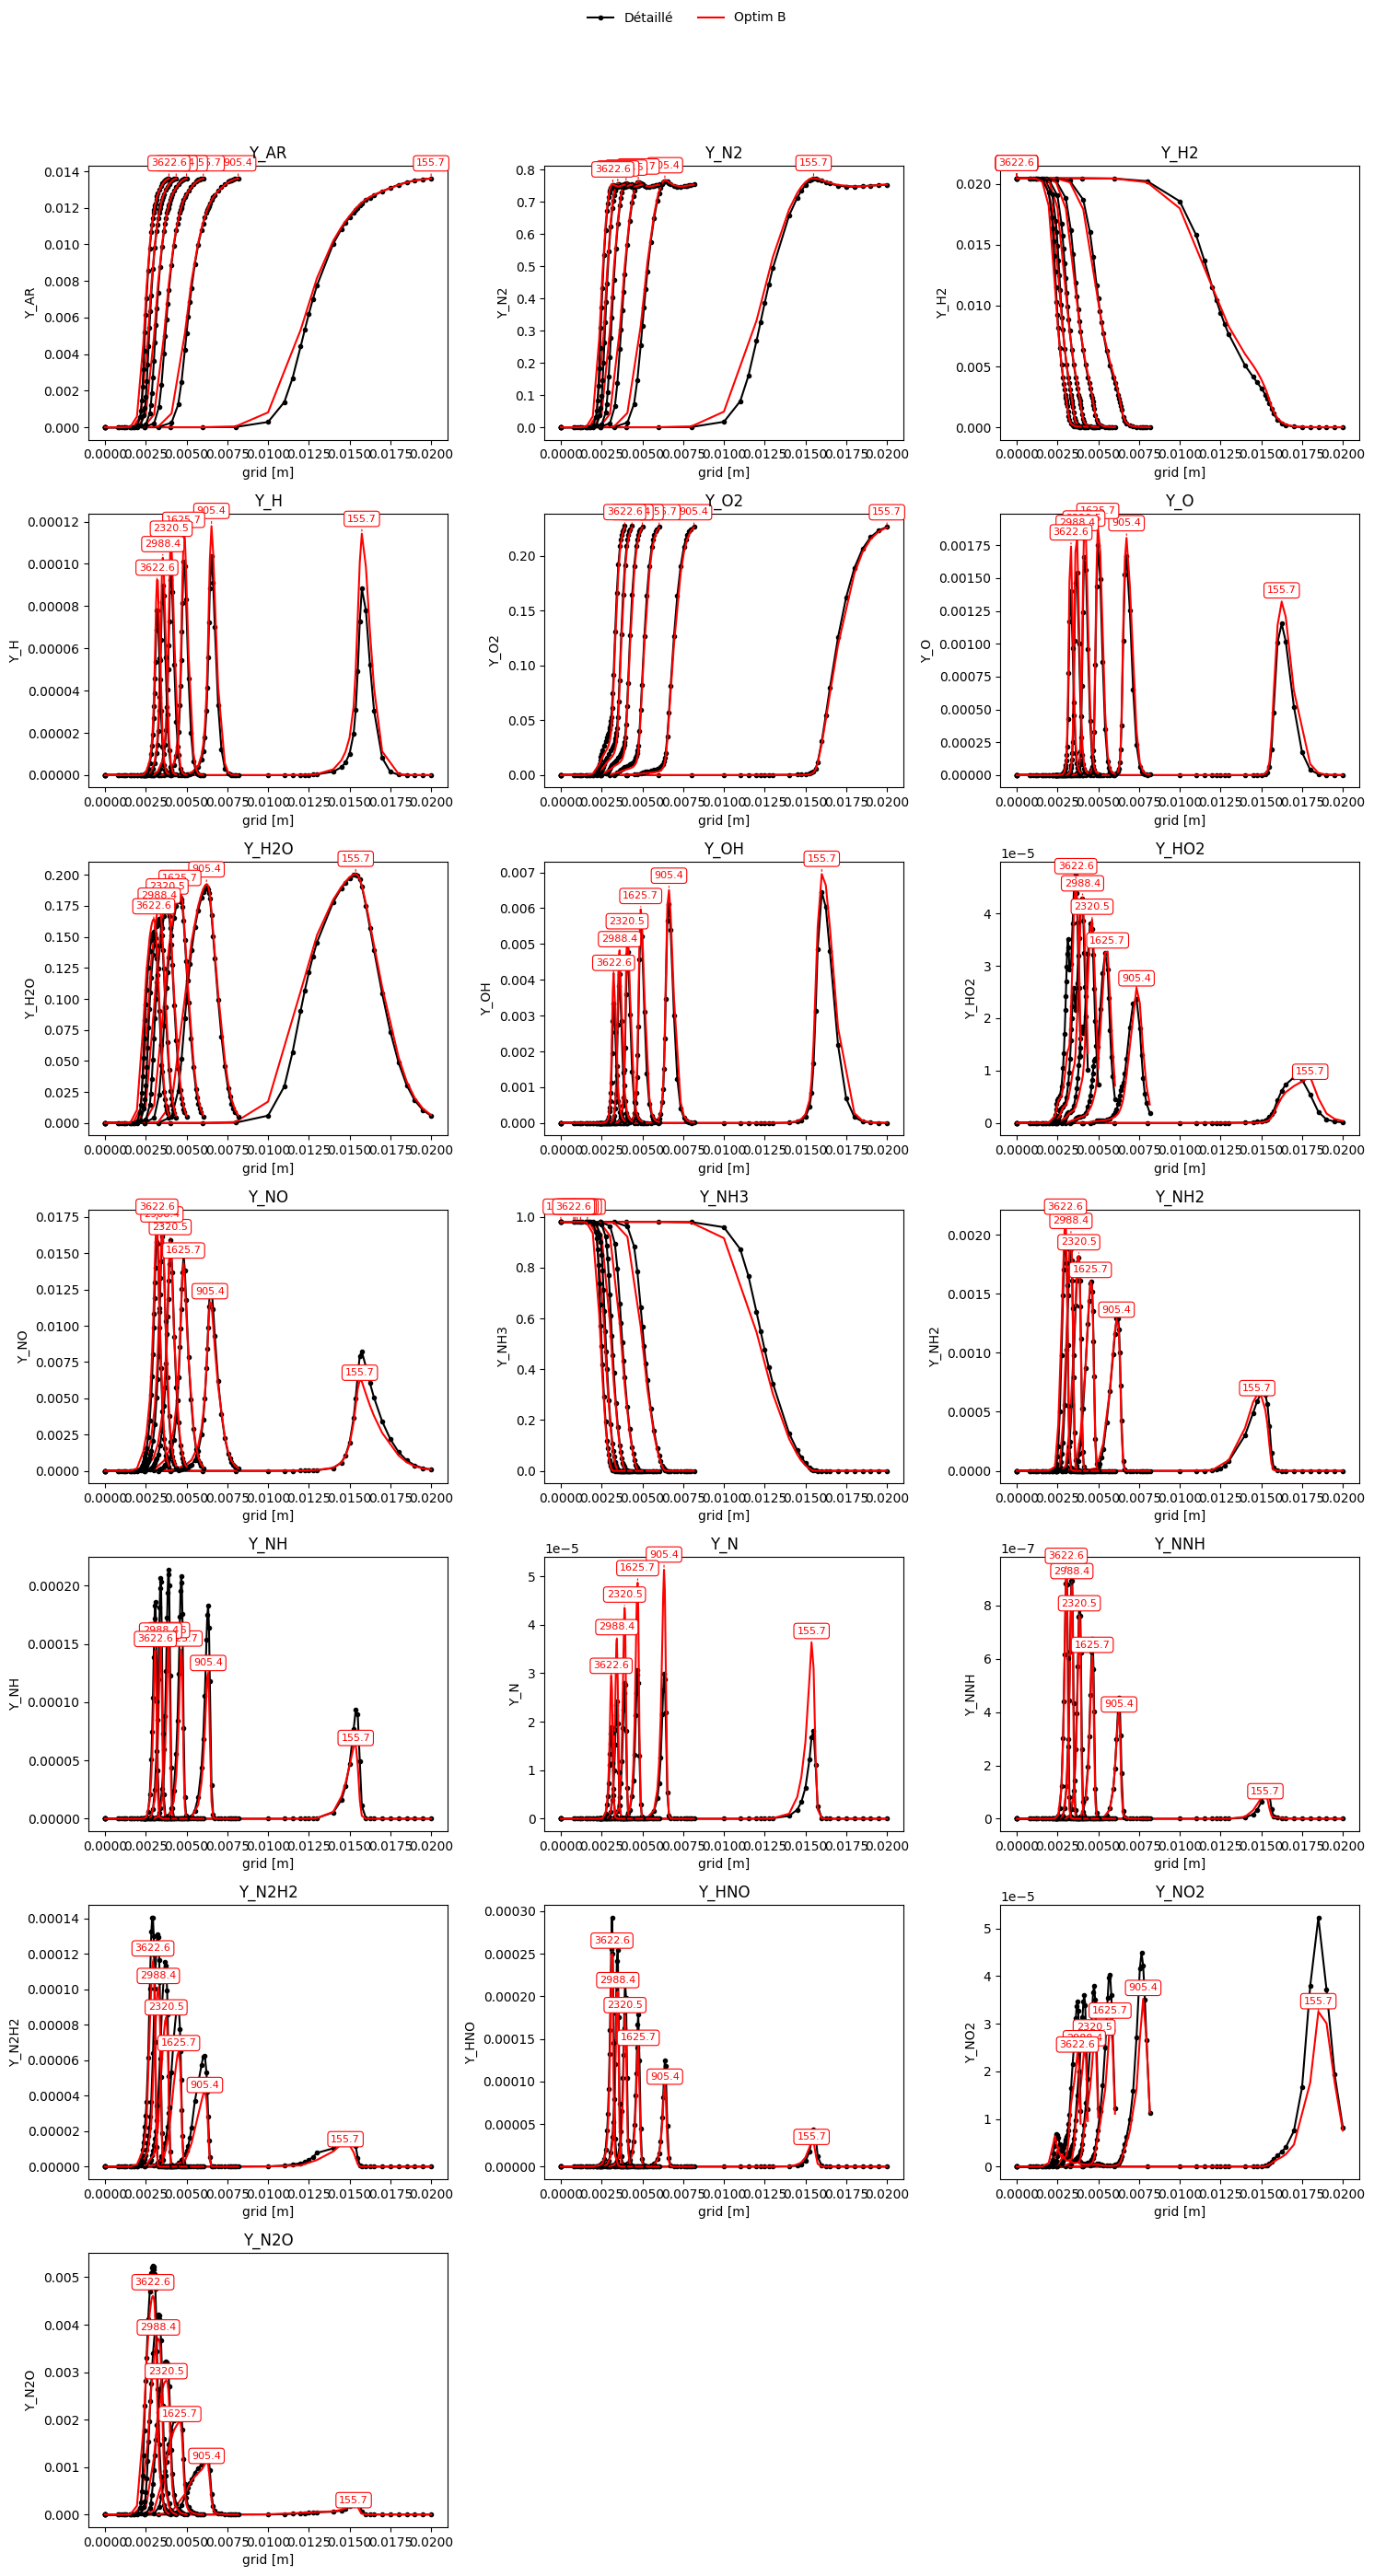

In [46]:
# Liste des espèces (colonnes qui commencent par "Y_")
species = [col for col in data_r.columns if col.startswith("Y_")]

# Boucle sur les températures initiales
for T_Init in data_d["T_Init"].unique():
    sub_d = data_d[data_d["T_Init"] == T_Init]
    sub_r = data_r[data_r["T_Init"] == T_Init]

    n_species = len(species)
    n_cols = 3
    n_rows = (n_species + n_cols - 1) // n_cols

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4 * n_rows), squeeze=False)

    # Union des global_strain
    unique_strains = sorted(set(sub_d["global_strain"].unique()) | set(sub_r["global_strain"].unique()))

    for i, s in enumerate(species):
        row, col = divmod(i, n_cols)
        ax = axs[row][col]

        for strain in unique_strains:
            # Courbe détaillée (noir)
            if strain in sub_d["global_strain"].values:
                sub_sub_d = sub_d[sub_d["global_strain"] == strain]
                ax.plot(sub_sub_d["common_grid"], sub_sub_d[s], 'k.-')

            # Courbe réduite (rouge)
            if strain in sub_r["global_strain"].values:
                sub_sub_r = sub_r[sub_r["global_strain"] == strain]
                ax.plot(sub_sub_r["common_grid"], sub_sub_r[s], 'r-')

                if not sub_sub_r[s].isnull().all() and sub_sub_r[s].max() > 0:
                    idx_max = sub_sub_r[s].idxmax()
                    Cmax = sub_sub_r.loc[idx_max, s]
                    x_Cmax = sub_sub_r.loc[idx_max, "common_grid"]
                    local_strain_val = sub_sub_r.loc[idx_max, "local_strain"]
                    y_offset = 0.05 * Cmax

                    ax.annotate(
                        text=f"{local_strain_val:.1f}",
                        xy=(x_Cmax, Cmax),
                        xytext=(x_Cmax, Cmax + y_offset),
                        textcoords='data',
                        ha='center',
                        fontsize=8,
                        color='red',
                        bbox=dict(boxstyle="round,pad=0.3", fc="white", ec="red", lw=0.8),
                        arrowprops=dict(arrowstyle="-", color='red', lw=0.8),
                    )

        ax.set_xlabel("grid [m]")
        ax.set_ylabel(s)
        ax.set_title(s)

    # Supprimer les subplots vides
    for i in range(n_species, n_rows * n_cols):
        row, col = divmod(i, n_cols)
        fig.delaxes(axs[row][col])

    # Légende globale
    legend_elements = [
        Line2D([0], [0], color='black', marker='.', linestyle='-', label='Détaillé'),
        Line2D([0], [0], color='red', linestyle='-', label='Optim B')
    ]
    fig.legend(handles=legend_elements, loc='upper center', ncol=2, frameon=False)

    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Laisser de l’espace pour la légende globale
    plt.savefig(f"CF_Species_Profile_T{T_Init}_Processing.png")
    plt.show()
